# Notebook for ML explainability 

This notebook serves as an aid for better understanding the "decision process" of the agent and visualize it.

In [1]:
import torch
import numpy as np
from utils.util import *
import matplotlib.pyplot as plt
from envs.snake import SnakeEnv
from agents.q_agent import *
from utils.wrapper import MultiFrame

In [2]:
action_to_direction = {
            0: 'right',
            1: 'down',
            2: 'left',
            3: 'up'
        }

In [38]:
env = SnakeEnv('rgb_array', 10)
env = MultiFrame(env,2)
agent, _ = load_config_file(DQNAgent, '../configs/dqn-cnn/DQN-CNN-V3.yaml', '../saved_agent/', False)
observation,_,pixels = env.reset()
grid = agent._get_state_from_obs(observation)
action = agent.select_action(observation)

left


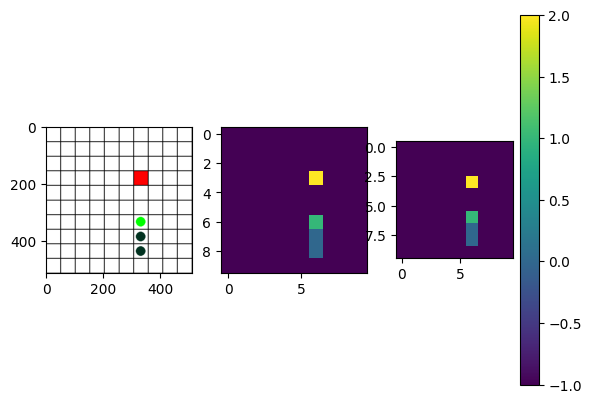

In [39]:
plt.subplot(1,3,1)
plt.imshow(pixels)
plt.subplot(1,3,2)
plt.imshow(grid[0,1].detach().numpy())
plt.subplot(1,3,3)
plt.imshow(grid[0,0].detach().numpy())
plt.colorbar()
observation, reward, target, terminated, info, pixels = env.step(action)
grid = agent._get_state_from_obs(observation)
action = agent.select_action(observation)
print(action_to_direction[action])

In [41]:
total_params = sum(p.numel() for p in agent.value_function.parameters())
total_params

1633188